In [4]:
# import the important packages
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')
#from sklearn.preprocessing import StandardScale
import os

In [5]:
# define functions

# reads data from an xml-file
def read_data(file):
    with open(file, 'r') as f:
        data = f.read() 
    bs_data = bs(data, 'xml') 
    return bs_data

# abstract out the calculation for euclidian distances
def calc(b_name, i):
    a1 = b_name[i].find_all('component')[0].get('data')
    b1 = b_name[i].find_all('component')[1].get('data')
    c1 = b_name[i].find_all('component')[2].get('data')
    x = np.asarray([float(x) for x in a1.split(',')])
    y = np.asarray([float(y) for y in b1.split(',')])
    z = np.asarray([float(z) for z in c1.split(',')])
    r = (x**2 + y**2 + z**2)**0.5
    # print(a1)
    return r

# calculates distance based on data, returns a dataframe
def calc_euclidian_distances(bs_data, low, high):
    b_name = bs_data.find_all('name')

    attributes = []
    # finds all values 
    for i in range(len(b_name)):
        attributes.append(b_name[i].get('value'))

    attributes = list(attributes)
    collection = {}
    #print(attributes)
    
    # finds x-, y- and z-values and computes euclidian distance
    # for first values
    for i in range(low, high):
        r = calc(b_name, i)
        collection[attributes[i]] = r

    df = pd.DataFrame(collection)
    return df

In [6]:
df_list = []
for xml_file in os.listdir("../Timeseries"):
    if xml_file.startswith("timeseries"):
        #print(xml_file)
        bs_data = read_data("../Timeseries/" + xml_file)
        b_name = bs_data.find_all('name')
        try:
            df1 = calc_euclidian_distances(bs_data, 0, int(len(b_name)/4))
            df_list.append(df1)
        except:
            print(xml_file + " failed to compute")


timeseries-11.xml failed to compute
timeseries-45.xml failed to compute
timeseries-6.xml failed to compute


fail :(
fail :(
fail :(


Text(0, 0.5, 'Lefts')

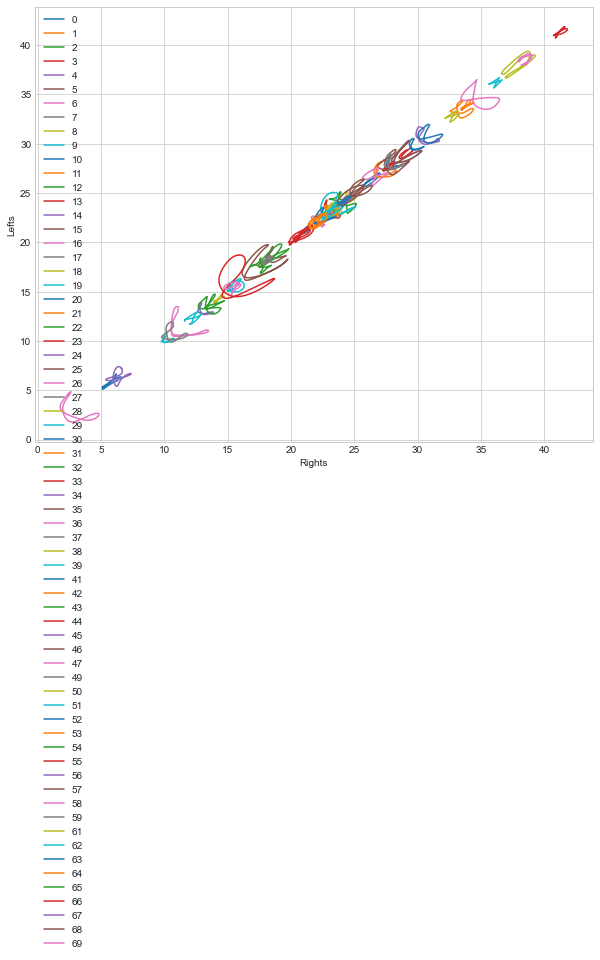

In [7]:
# difficulty 1
plt.figure(figsize = (10,8))
index = 0

for person in df_list:
    try: 
        plt.plot(person['Right Pelvic Angles'], person['Left Pelvic Angles'], label = index)
    except: 
        print("fail :(")
    index += 1
plt.legend()
plt.xlabel('Rights')
plt.ylabel('Lefts')

fail :(
fail :(
fail :(


Text(0, 0.5, 'Lefts')

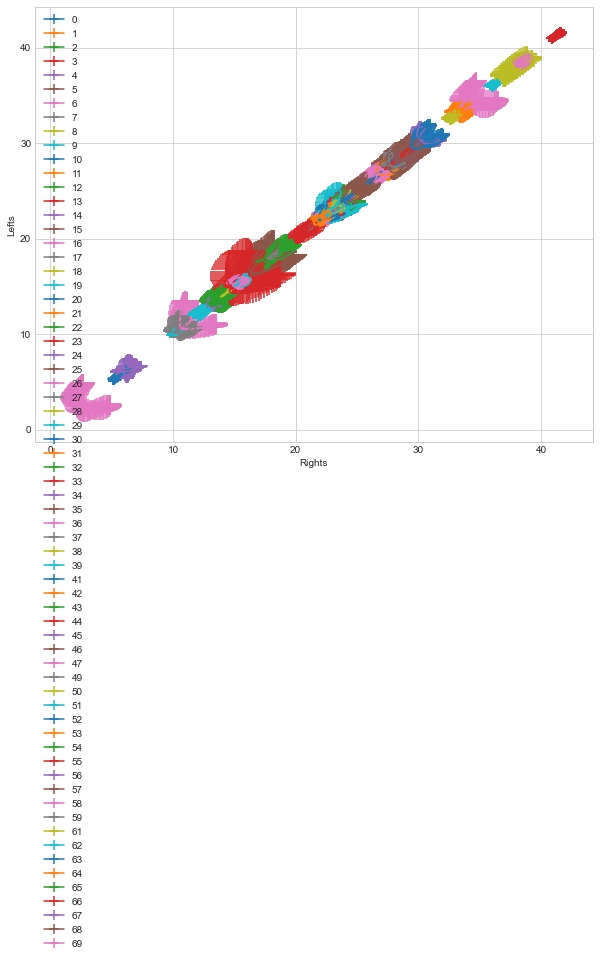

In [8]:
# plot std of people
plt.figure(figsize = (10,8))
index = 0

for person in df_list:
    try: 
        plt.errorbar(person['Right Pelvic Angles'], person['Left Pelvic Angles'], xerr=person['Right Pelvic Angles'].std(), yerr=person['Left Pelvic Angles'].std(), label = index)
    except: 
        print("fail :(")
    index += 1
plt.legend()
plt.xlabel('Rights')
plt.ylabel('Lefts')


timeseries-11.xml failed to compute
timeseries-6.xml failed to compute


Text(0, 0.5, 'Lefts')

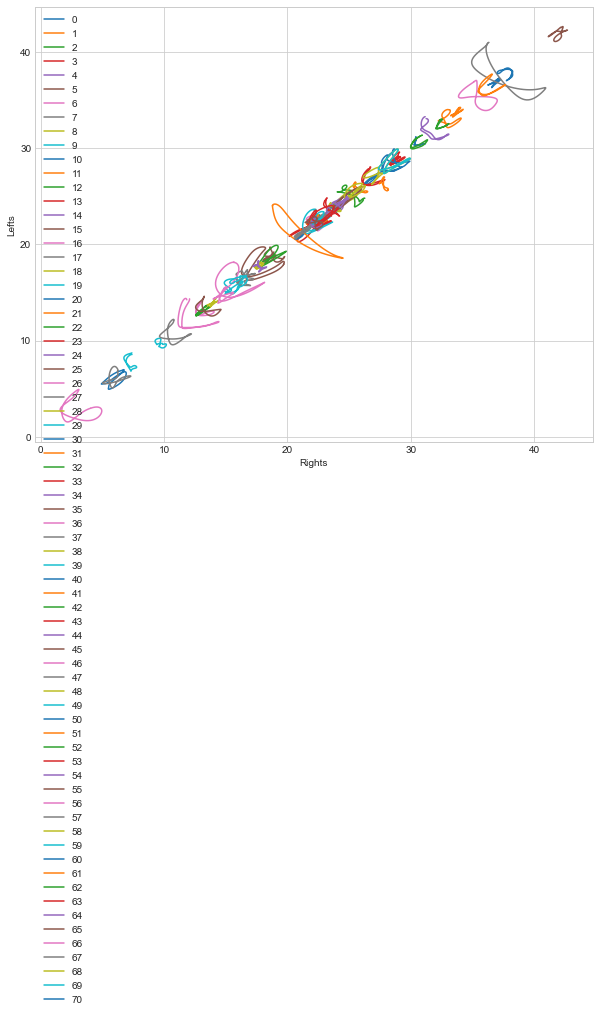

In [9]:
# difficulty 2

df_list = []
for xml_file in os.listdir("../Timeseries"):
    if xml_file.startswith("timeseries"):
        #print(xml_file)
        bs_data = read_data("../Timeseries/" + xml_file)
        b_name = bs_data.find_all('name')
        try:
            df1 = calc_euclidian_distances(bs_data, int(len(b_name)/4), int(len(b_name)/2))
            df_list.append(df1)
        except:
            print(xml_file + " failed to compute")

plt.figure(figsize = (10,8))
index = 0

for person in df_list:
    try: 
        plt.plot(person['Right Pelvic Angles'], person['Left Pelvic Angles'], label = index)
    except: 
        print("fail :(")
    index += 1
plt.legend()
plt.xlabel('Rights')
plt.ylabel('Lefts')



timeseries-11.xml failed to compute
timeseries-6.xml failed to compute
fail :(
fail :(
fail :(


Text(0, 0.5, 'Lefts')

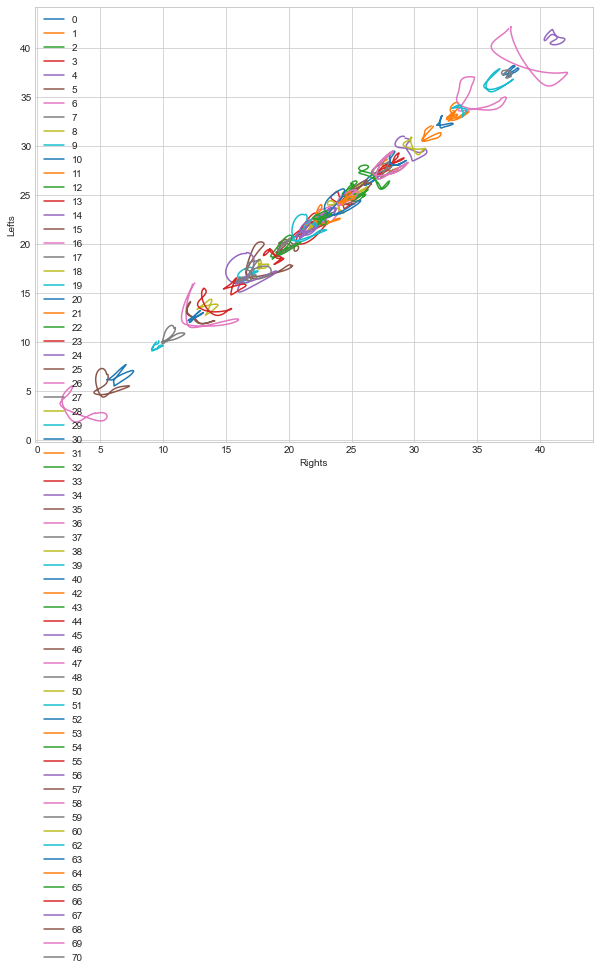

In [14]:
# difficulty 3
df_list = []
for xml_file in os.listdir("../Timeseries"):
    if xml_file.startswith("timeseries"):
        #print(xml_file)
        bs_data = read_data("../Timeseries/" + xml_file)
        b_name = bs_data.find_all('name')
        try:
            df1 = calc_euclidian_distances(bs_data, int(len(b_name)/2), int((3 * len(b_name))/4))
            df_list.append(df1)
        except:
            print(xml_file + " failed to compute")

plt.figure(figsize = (10,8))
index = 0

for person in df_list:
    try: 
        plt.plot(person['Right Pelvic Angles'], person['Left Pelvic Angles'], label = index)
    except: 
        print("fail :(")
    index += 1
plt.legend()
plt.xlabel('Rights')
plt.ylabel('Lefts')



timeseries-11.xml failed to compute
timeseries-24.xml failed to compute
timeseries-6.xml failed to compute


Text(0, 0.5, 'Lefts')

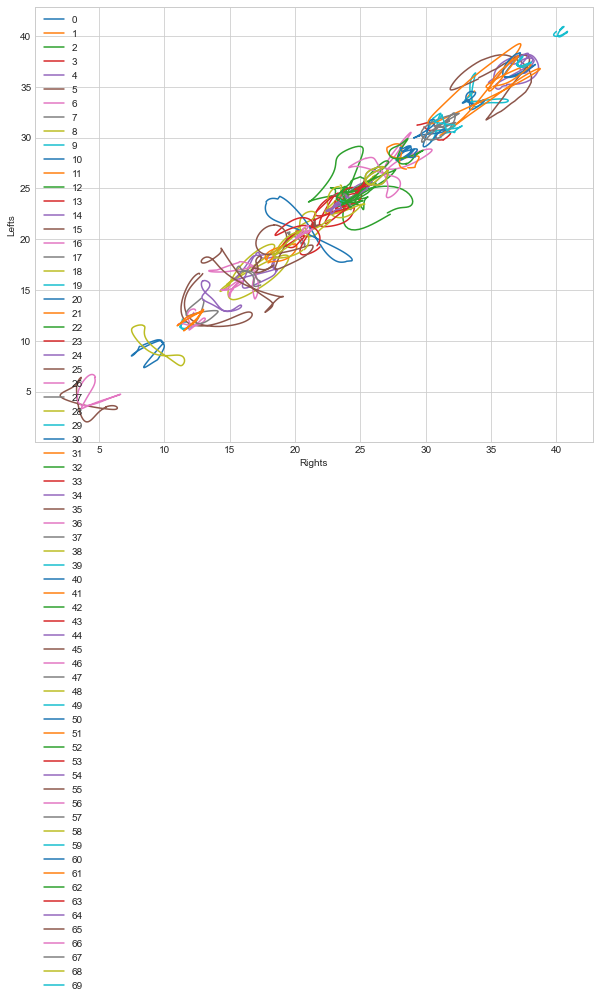

In [16]:
# difficulty 4
df_list = []
for xml_file in os.listdir("../Timeseries"):
    if xml_file.startswith("timeseries"):
        #print(xml_file)
        bs_data = read_data("../Timeseries/" + xml_file)
        b_name = bs_data.find_all('name')
        try:
            df1 = calc_euclidian_distances(bs_data, int((3 * len(b_name))/4), len(b_name))
            df_list.append(df1)
        except:
            print(xml_file + " failed to compute")

plt.figure(figsize = (10,8))
index = 0

for person in df_list:
    try: 
        plt.plot(person['Right Pelvic Angles'], person['Left Pelvic Angles'], label = index)
    except: 
        print("fail :(")
    index += 1
plt.legend()
plt.xlabel('Rights')
plt.ylabel('Lefts')



Text(0, 0.5, 'Lefts')

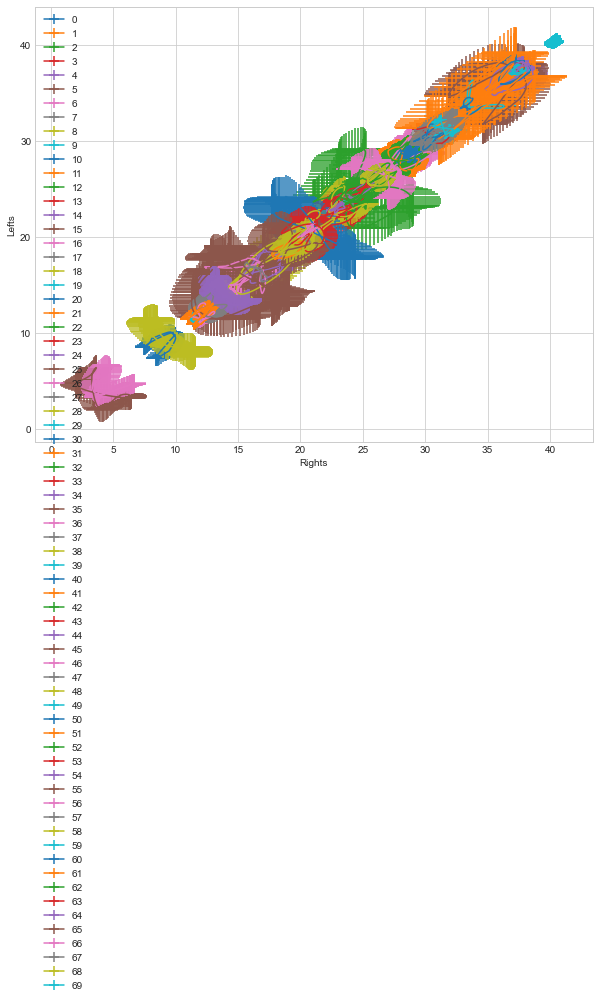

In [17]:
# plot std of people
plt.figure(figsize = (10,8))
index = 0

for person in df_list:
    try: 
        plt.errorbar(person['Right Pelvic Angles'], person['Left Pelvic Angles'], xerr=person['Right Pelvic Angles'].std(), yerr=person['Left Pelvic Angles'].std(), label = index)
    except: 
        print("fail :(")
    index += 1
plt.legend()
plt.xlabel('Rights')
plt.ylabel('Lefts')


Text(0, 0.5, 'Lefts')

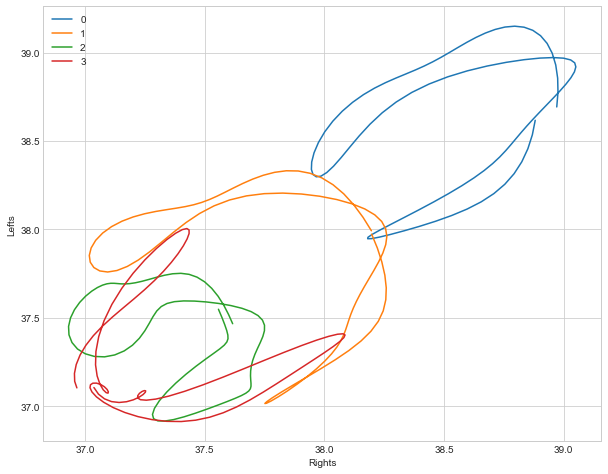

In [23]:

# try it on the first person, 4 wattages
bs_data = read_data("../Timeseries/timeseries.xml")
person = []
b_name = bs_data.find_all('name')
length = len(b_name)
df = calc_euclidian_distances(bs_data, 0, int(length/4))
df1 = calc_euclidian_distances(bs_data, int(length/4), int(length/2))
df2 = calc_euclidian_distances(bs_data, int(length/2), int((3 * length)/4))
df3 = calc_euclidian_distances(bs_data, int(3 * int(length/4)), length)

person.append(df)
person.append(df1)
person.append(df2)
person.append(df3)

# plot a figure
plt.figure(figsize = (10,8))
index = 0

for person in person:
    try: 
        plt.plot(person['Right Pelvic Angles'], person['Left Pelvic Angles'], label = index)
    except: 
        print("fail :(")
    index += 1
    
plt.legend()
plt.xlabel('Rights')
plt.ylabel('Lefts')



Text(0, 0.5, 'Lefts')

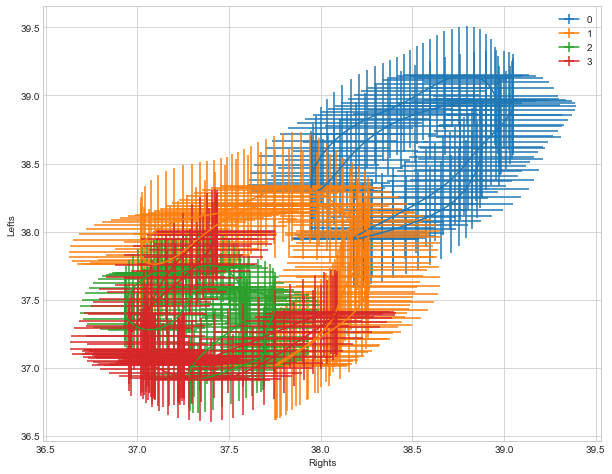

In [33]:
# try it on the first person, 4 wattages
bs_data = read_data("../Timeseries/timeseries.xml")
person = []
b_name = bs_data.find_all('name')
length = len(b_name)
df = calc_euclidian_distances(bs_data, 0, int(length/4))
df1 = calc_euclidian_distances(bs_data, int(length/4), int(length/2))
df2 = calc_euclidian_distances(bs_data, int(length/2), int((3 * length)/4))
df3 = calc_euclidian_distances(bs_data, int(3 * int(length/4)), length)

person.append(df)
person.append(df1)
person.append(df2)
person.append(df3)
# plot a figure
plt.figure(figsize = (10,8))
index = 0

for person in person:
    try: 
        plt.errorbar(person['Right Pelvic Angles'], person['Left Pelvic Angles'], xerr=person['Right Pelvic Angles'].std(), yerr=person['Left Pelvic Angles'].std(), label = index)
    except: 
        print("fail :(")
    index += 1
    
plt.legend()
plt.xlabel('Rights')
plt.ylabel('Lefts')



timeseries-11.xml failed to compute
timeseries-45.xml failed to compute
timeseries-6.xml failed to compute


No handles with labels found to put in legend.


fail :(
fail :(
fail :(
timeseries-11.xml failed to compute
timeseries-6.xml failed to compute


No handles with labels found to put in legend.


timeseries-11.xml failed to compute
timeseries-6.xml failed to compute


No handles with labels found to put in legend.


fail :(
fail :(
fail :(
timeseries-11.xml failed to compute
timeseries-24.xml failed to compute
timeseries-6.xml failed to compute


No handles with labels found to put in legend.


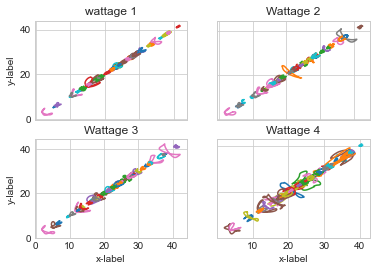

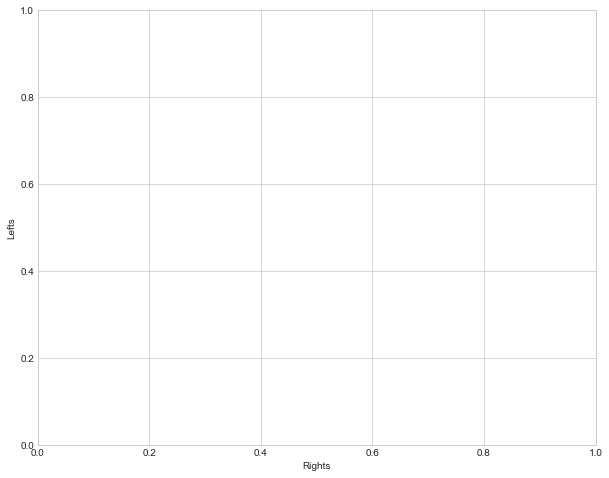

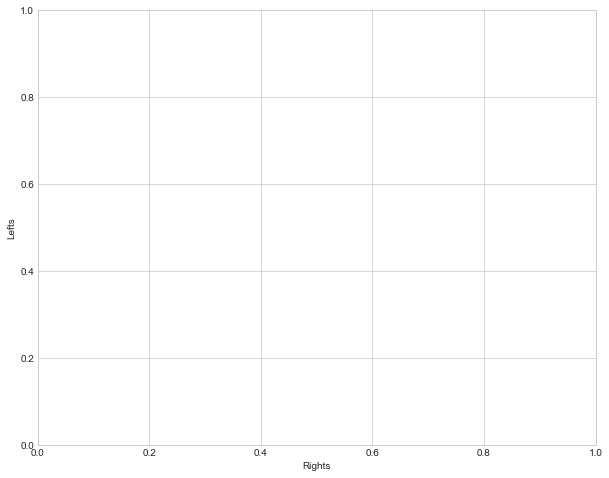

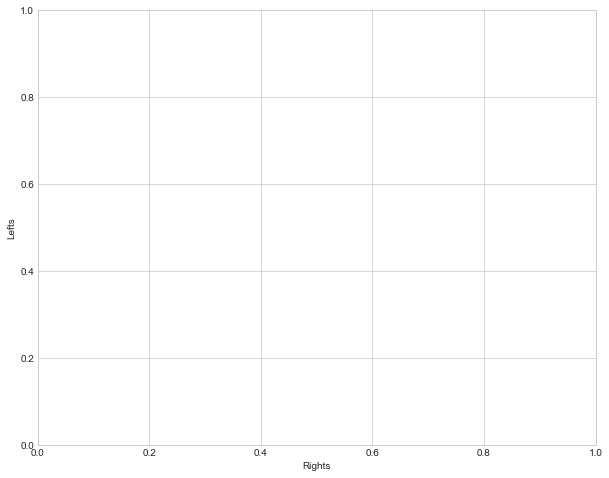

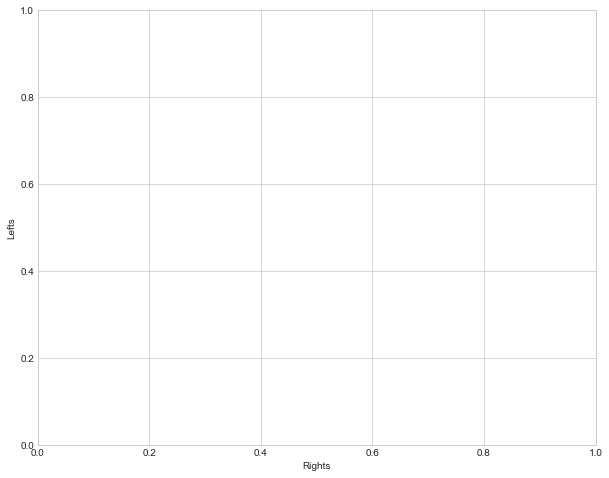

In [36]:
# TODO make it better maybe
# TODO make it use plotly instead maybe

fig, axs = plt.subplots(2, 2)

df_list = []
for xml_file in os.listdir("../Timeseries"):
    if xml_file.startswith("timeseries"):
        #print(xml_file)
        bs_data = read_data("../Timeseries/" + xml_file)
        b_name = bs_data.find_all('name')
        try:
            df1 = calc_euclidian_distances(bs_data, 0, int(len(b_name)/4))
            df_list.append(df1)
        except:
            print(xml_file + " failed to compute")

# difficulty 1
plt.figure(figsize = (10,8))
index = 0

for person in df_list:
    try: 
        axs[0, 0].plot(person['Right Pelvic Angles'], person['Left Pelvic Angles'], label = index)
    except: 
        print("fail :(")
    index += 1
plt.legend()
plt.xlabel('Rights')
plt.ylabel('Lefts')

axs[0, 0].set_title('wattage 1')

# difficulty 2

df_list = []
for xml_file in os.listdir("../Timeseries"):
    if xml_file.startswith("timeseries"):
        #print(xml_file)
        bs_data = read_data("../Timeseries/" + xml_file)
        b_name = bs_data.find_all('name')
        try:
            df1 = calc_euclidian_distances(bs_data, int(len(b_name)/4), int(len(b_name)/2))
            df_list.append(df1)
        except:
            print(xml_file + " failed to compute")

plt.figure(figsize = (10,8))
index = 0

for person in df_list:
    try: 
        axs[0, 1].plot(person['Right Pelvic Angles'], person['Left Pelvic Angles'], label = index)
    except: 
        print("fail :(")
    index += 1
plt.legend()
plt.xlabel('Rights')
plt.ylabel('Lefts')

axs[0, 1].set_title('Wattage 2')

# difficulty 3
df_list = []
for xml_file in os.listdir("../Timeseries"):
    if xml_file.startswith("timeseries"):
        #print(xml_file)
        bs_data = read_data("../Timeseries/" + xml_file)
        b_name = bs_data.find_all('name')
        try:
            df1 = calc_euclidian_distances(bs_data, int(len(b_name)/2), int((3 * len(b_name))/4))
            df_list.append(df1)
        except:
            print(xml_file + " failed to compute")

plt.figure(figsize = (10,8))
index = 0

for person in df_list:
    try: 
        axs[1, 0].plot(person['Right Pelvic Angles'], person['Left Pelvic Angles'], label = index)
    except: 
        print("fail :(")
    index += 1
plt.legend()
plt.xlabel('Rights')
plt.ylabel('Lefts')

axs[1, 0].set_title('Wattage 3')

# difficulty 4
df_list = []
for xml_file in os.listdir("../Timeseries"):
    if xml_file.startswith("timeseries"):
        #print(xml_file)
        bs_data = read_data("../Timeseries/" + xml_file)
        b_name = bs_data.find_all('name')
        try:
            df1 = calc_euclidian_distances(bs_data, int((3 * len(b_name))/4), len(b_name))
            df_list.append(df1)
        except:
            print(xml_file + " failed to compute")

plt.figure(figsize = (10,8))
index = 0

for person in df_list:
    try: 
        axs[1, 1].plot(person['Right Pelvic Angles'], person['Left Pelvic Angles'], label = index)
    except: 
        print("fail :(")
    index += 1
plt.legend()
plt.xlabel('Rights')
plt.ylabel('Lefts')

axs[1, 1].set_title('Wattage 4')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()